In [2]:
!pip install -e .

Obtaining file:///home/user/FusionTransformer
  Attempting uninstall: FusionTransformer
    Found existing installation: FusionTransformer 0.0.1
    Uninstalling FusionTransformer-0.0.1:
      Successfully uninstalled FusionTransformer-0.0.1
  Running setup.py develop for FusionTransformer


In [1]:
import pickle

In [2]:
from PIL import Image

In [3]:
# from FusionTransformer.data.utils.visualize import draw_points_image_labels

In [4]:
from FusionTransformer.data.utils.visualize import SEMANTIC_KITTI_COLOR_PALETTE

In [5]:
import numpy as np
import cv2

In [6]:
import matplotlib.pyplot as plt

In [7]:
labels ={
  0 : "unlabeled",
  1 : "outlier",
  10: "car",
  11: "bicycle",
  13: "bus",
  15: "motorcycle",
  16: "on-rails",
  18: "truck",
  20: "other-vehicle",
  30: "person",
  31: "bicyclist",
  32: "motorcyclist",
  40: "road",
  44: "parking",
  48: "sidewalk",
  49: "other-ground",
  50: "building",
  51: "fence",
  52: "other-structure",
  60: "lane-marking",
  70: "vegetation",
  71: "trunk",
  72: "terrain",
  80: "pole",
  81: "traffic-sign",
  99: "other-object",
  252: "moving-car",
  253: "moving-bicyclist",
  254: "moving-person",
  255: "moving-motorcyclist",
  256: "moving-on-rails",
  257: "moving-bus",
  258: "moving-truck",
  259: "moving-other-vehicle"
}

In [8]:
with open("/home/user/SemanticKitti/preprocessed/08/scan_data_1.pkl", 'rb') as f:
    filter_data = pickle.load(f)

In [9]:
type(filter_data)

dict

In [10]:
filter_data.keys()

dict_keys(['points', 'feats', 'seg_labels', 'points_img', 'lidar_path', 'camera_path', 'image_size'])

In [11]:
filter_data["camera_path"]

'dataset/sequences/08/image_2/000001.png'

In [12]:
img_path = "/home/user/SemanticKitti/" + filter_data["camera_path"]

In [13]:
image_width = 1226
image_height = 370

In [14]:
# image = Image.open(img_path).crop((0, 0, image_width, image_height))

In [15]:
# draw_points_image_labels(img=image, 
#                          img_indices=filter_data["points_img"], 
#                          seg_labels=filter_data["seg_labels"], 
#                          show=True, 
#                          color_palette_type='SemanticKITTI_long', 
#                          point_size=0.5)

In [16]:
def draw_points_image_labels(img, img_indices, seg_labels, show=True, point_size=0.5, sp=None):
    img = img.copy()
    color_palette = SEMANTIC_KITTI_COLOR_PALETTE
    color_palette = np.array(color_palette) #/ 255.
    seg_labels[seg_labels == 0] = len(color_palette) - 1
    colors = color_palette[seg_labels]
    if sp is not None:
        colors= colors[seg_labels == sp]
        img_indices = img_indices[seg_labels == sp]
    
    for i in range(img_indices.shape[0]):
        x, y = img_indices[i, :].astype(np.int64)
        cv2.circle(img, center=(y,x), radius=2, color=colors[i].tolist())

    return img

In [17]:
img = cv2.imread(img_path)

In [18]:
img.shape

(370, 1226, 3)

In [19]:
img = img[:image_height, :image_width, :]

In [20]:
img.shape

(370, 1226, 3)

In [21]:
filter_data["points_img"].shape

(20004, 2)

In [22]:
filter_data["seg_labels"].shape

(20004,)

In [23]:
to_names = lambda l: [ (labels[i],i) for i in np.unique(l).tolist()]

In [24]:
to_names(filter_data["seg_labels"])

[('unlabeled', 0),
 ('car', 10),
 ('bicycle', 11),
 ('person', 30),
 ('road', 40),
 ('parking', 44),
 ('sidewalk', 48),
 ('building', 50),
 ('fence', 51),
 ('vegetation', 70),
 ('trunk', 71),
 ('terrain', 72),
 ('pole', 80),
 ('traffic-sign', 81),
 ('other-object', 99),
 ('moving-car', 252),
 ('moving-person', 254)]

In [38]:
colored_img = draw_points_image_labels(img=img, 
                         img_indices=filter_data["points_img"], 
                         seg_labels=filter_data["seg_labels"], 
                         show=True,  
                         point_size=0.5,
                         sp=30)

In [39]:
colored_img = cv2.cvtColor(colored_img, cv2.COLOR_BGR2RGB)

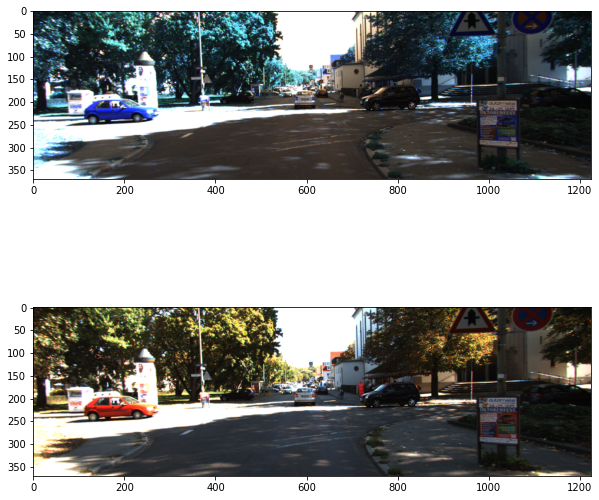

In [40]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
ax[1].imshow(colored_img)
ax[0].imshow(img)